# Output variable -> y

y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

## EDA

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
oi = OrdinalEncoder()
li = LabelEncoder()

In [9]:
df.iloc[:,[1,2,3,4,6,7,8,10,15]] = oi.fit_transform(df.iloc[:,[1,2,3,4,6,7,8,10,15]])
df['y'] = li.fit_transform(df['y'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0,1
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0,1
45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,0.0,17,9.0,1127,5,184,3,2.0,1
45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0,0


## Data spliting

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = df.iloc[:,1:-1]
y = df['y']

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.20, random_state=1)

## Model Building

In [13]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [14]:
# Training model
lg.fit(xtrain, ytrain)

#Prediction
ypred = lg.predict(xtest)

## Model Evalution

In [16]:
print('Actual Y: ', ytest[:25].values)
print('Predict Y:', ypred[:25])

Actual Y:  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predict Y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.54      0.18      0.27      1050

    accuracy                           0.89      9043
   macro avg       0.72      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [19]:
confusion_matrix(ytest,ypred)

array([[7827,  166],
       [ 858,  192]], dtype=int64)

In [20]:
pd.value_counts(df['y'])

0    39922
1     5289
Name: y, dtype: int64

In [26]:
# As we can see data imbalanced tosolve this we use upsamping method
from imblearn.over_sampling import SMOTE

In [27]:
sm = SMOTE(random_state=1)
x_res, y_res = sm.fit_resample(x, y.ravel())

In [28]:
x_res.shape, y_res.shape

((79844, 15), (79844,))

In [29]:
len(y_res[y_res == 0]), len(y_res[y_res == 1])

(39922, 39922)

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x_res, y_res, test_size=0.20, random_state=1)

In [32]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([0.19795988, 0.31345652, 0.13385245, ..., 0.37173547, 0.25840571,
       0.04900402])

In [33]:
from sklearn.metrics import roc_auc_score,roc_curve, accuracy_score

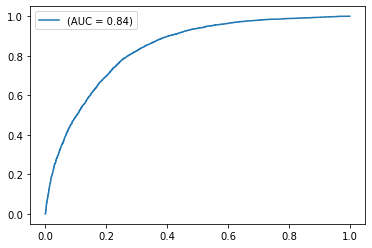

In [34]:
auc = roc_auc_score(ytest, proba)

fpr, tpr, threshold = roc_curve(ytest, proba)

plt.plot(fpr, tpr, label = '(AUC = %0.2f)'%auc)
plt.legend()

In [35]:
threshold

array([1.99985519e+00, 9.99855193e-01, 9.94451740e-01, ...,
       1.91844775e-04, 1.88382648e-04, 6.13748139e-09])

In [37]:
accuracy = []

for i in threshold:
    ypred = np.where(proba >i, 1, 0)
    accuracy.append(accuracy_score(ytest,ypred))
    
final_threshold = pd.concat([pd.Series(threshold), pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
3041,1.265709e-01,0.764669
3040,1.265784e-01,0.764669
3037,1.266587e-01,0.764606
3033,1.267199e-01,0.764606
2929,1.316396e-01,0.764606
...,...,...
3,9.938159e-01,0.501659
2,9.944517e-01,0.501597
0,1.999855e+00,0.500031
1,9.998552e-01,0.500031


In [38]:
from sklearn.preprocessing import binarize

In [39]:
z = binarize([proba], threshold= 0.1154994)[0]
z

array([1., 1., 1., ..., 1., 1., 0.])

In [40]:
print(classification_report(ytest, z))

              precision    recall  f1-score   support

           0       0.81      0.69      0.74      7985
           1       0.73      0.83      0.78      7984

    accuracy                           0.76     15969
   macro avg       0.77      0.76      0.76     15969
weighted avg       0.77      0.76      0.76     15969

